In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import sys
import glob
import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import pickle

In [19]:
stop = stopwords.words('english')
stop = stop + [u'said',u'back',u'know',u'little']

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in sorted(glob.glob(os.path.join(path, '*.txt'))):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    #stopped = [w for w in docwords if not w in stop]
    #p_stem = PorterStemmer()
    #stemmed_words = [p_stem.stem(i) for i in stopped]
    texts.append(docwords)


In [82]:
output = open('texts.pkl', 'wb')

In [83]:
pickle.dump(texts, output)

In [84]:
output.close()

In [70]:
#for i in texts: print i[0:50], '\n'

In [13]:
textpickle = open('texts.pkl', 'rb')

texts = pickle.load(textpickle)

#### words across corpus

In [4]:
len(texts)

7

In [12]:
together = [item for sublist in texts for item in sublist]

In [6]:
len(together)

558091

In [7]:
unique = set(together)

In [8]:
len(unique)

15532

In [13]:
from nltk import Text

In [14]:
from nltk import FreqDist

In [15]:
books = nltk.Text(together)

In [16]:
import pylab

In [154]:
from nltk.draw import dispersion_plot

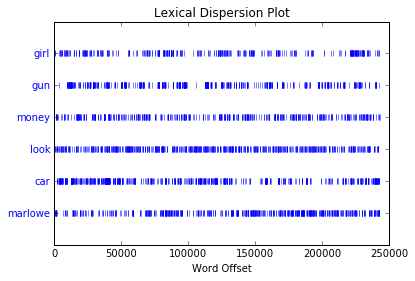

In [155]:
books.dispersion_plot(['girl','gun','money','look','car','marlowe'])

In [145]:
bookwords = [i for i in books]

In [77]:
books.similar('man')

guy one woman boy girl door think hand way fellow go let car tall good
leaned side got thing kind


In [78]:
books.similar('gun')

hand right around away money hat wallet card head one slowly glass
bottle came left think held photostat went hard


In [79]:
books.similar('girl')

man somebody around one morning right see wearily guy thing son way
voice check anybody hand well looked left cute


In [80]:
books.common_contexts(['man','gun'])

No common contexts were found


In [37]:
import nltk
 
def get_all_phases_containing_tar_wrd(target_word, left_margin = 10, right_margin = 10):
    """
        Function to get all the phases that contain the target word in a text/passage tar_passage.
        Workaround to save the output given by nltk Concordance function
         
        str target_word, str tar_passage int left_margin int right_margin --> list of str
        left_margin and right_margin allocate the number of words/pununciation before and after target word
        Left margin will take note of the beginning of the text
    """
     
    ## Create list of tokens using nltk function
    #tokens = nltk.word_tokenize(tar_passage)
     
    ## Create the text of tokens
    #text = nltk.Text(tokens)
 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(books.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([books.tokens[map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset])[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [39]:
similes = get_all_phases_containing_tar_wrd('like')

In [40]:
len(similes)

2036

In [42]:
import random

In [48]:
random.sample(similes, 20)

[u'see around hope drifted office like something blown wind 46 drove victor idea drinking gimlet ',
 u'speak piece try pull phonies like telephone call murder case breeze try run best found ',
 u'willing throw scare roommate telephone like mentioning names took twenty minutes tell kneaded bag incessantly ',
 u'indeed must shall come sure like things westons us quite delightful cannot think sweet place ',
 u'drink hungry lit cigarette tasted like plumber handkerchief nodded across office mr rembrandt reached hat ',
 u'marlowe large quite sure going like one damned bit speak piece drift away like place ',
 u'mother whatever right silence gives like like like house particularly like wife like merle kind ',
 u'assessments monkeys prowl car lot like city hall sit hands ask law enforced unlatched car ',
 u'still ivory soap deal sound like red needle contemptuously investigated yet liked suicide verdict else ',
 u'taking stockings keeping made feel like whore right betty came bathroom looked 

In [19]:
books.concordance('man')

Displaying 25 of 1402 matches:
hot hard coal black eyes general look man would pay get along thought might gen
 holding seem bother tall thin silver man sixty close little past blue eyes rem
s could skin smooth bright moved like man sound muscles walked slowly across fl
chair wheel chair old obviously dying man watched us come black eyes fire died 
er stood front mr marlowe general old man move speak even nod looked lifelessly
acks legs sat took hat deft scoop old man dragged voice bottom well brandy norr
 brandy beneath may take coat sir hot man blood veins stood peeled coat got han
t automatically cigarette stopped old man caught gesture smiled faintly may smo
dowed comers mouth nice state affairs man indulge vices proxy dryly looking dul
soft wet heat like pall around us old man nodded neck afraid weight head butler
d shut behind jungle sipped drink old man licked lips watching drawing one lip 
orney investigator chief investigator man named bernie ohls called told wanted 
 policeme

In [81]:
books.collocations()

bay city; shook head; eddie mars; last night; los angeles; mrs
murdock; living room; bill chess; mavis weld; miss fromsett; long
time; philip marlowe; thousand dollars; door opened; could see; terry
lennox; harlan potter; new york; say anything; idle valley


In [146]:
books.count('gun') + books.count('guns')

700

In [17]:
fd = nltk.FreqDist(books)

In [84]:
fd

FreqDist({u'fawn': 27,
          u'raining': 6,
          u'tommyguns': 1,
          u'cussed': 1,
          u'yellow': 115,
          u'narcotic': 7,
          u'four': 200,
          u'gag': 18,
          u'woods': 6,
          u'clotted': 3,
          u'spiders': 3,
          u'knucks': 3,
          u'railing': 34,
          u'towns': 7,
          u'payoff': 4,
          u'looking': 529,
          u'canes': 1,
          u'fiddling': 2,
          u'attracted': 1,
          u'electricity': 2,
          u'chatter': 2,
          u'plowhorse': 1,
          u'unanswered': 1,
          u'sunlit': 1,
          u'originality': 1,
          u'fingernails': 29,
          u'opener': 6,
          u'lord': 2,
          u'immature': 1,
          u'flicking': 6,
          u'meadows': 2,
          u'shaving': 5,
          u'sinking': 1,
          u'swivel': 13,
          u'callin': 1,
          u'magoozium': 1,
          u'dell': 1,
          u'knelt': 2,
          u'anaemic': 1,
          u'forties

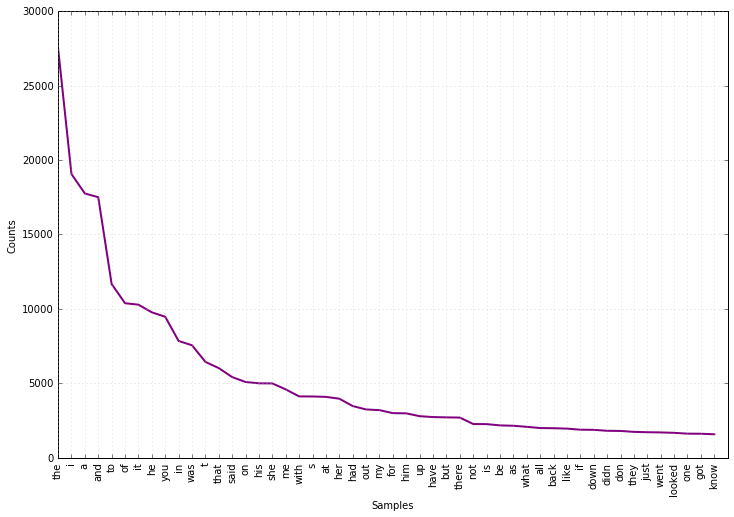

In [18]:
plt.figure(figsize = (12,8))
fd.plot(50,cumulative=False,color='purple')

In [25]:
fd.hapaxes()

[u'tommyguns',
 u'cussed',
 u'prices',
 u'peekin',
 u'increase',
 u'canes',
 u'camarillo',
 u'rupture',
 u'plowhorse',
 u'unanswered',
 u'sunlit',
 u'originality',
 u'clanked',
 u'immature',
 u'sinking',
 u'callin',
 u'dell',
 u'forties',
 u'broiler',
 u'yachting',
 u'dissolutely',
 u'jarringly',
 u'happenings',
 u'festered',
 u'specially',
 u'panther',
 u'shoelaces',
 u'tumed',
 u'shrugging',
 u'milled',
 u'tensely',
 u'unlisted',
 u'medically',
 u'automatics',
 u'9521',
 u'herd',
 u'repotting',
 u'finked',
 u'cult',
 u'confronts',
 u'natured',
 u'skipouts',
 u'uplifting',
 u'climber',
 u'burrow',
 u'_would_',
 u'classification',
 u'scold',
 u'lynne',
 u'shoddy',
 u'ducky',
 u'browse',
 u'42',
 u'swap',
 u'intake',
 u'morally',
 u'grimed',
 u'pompadour',
 u'aloofness',
 u'sweeter',
 u'plunges',
 u'mindedness',
 u'digit',
 u'caution',
 u'rayon',
 u'newscameramen',
 u'hog',
 u'magoozium',
 u'cutback',
 u'backstairs',
 u'canaries',
 u'dignified',
 u'terrycloth',
 u'hoot',
 u'despondent',

In [26]:
books.count('dame')

26

In [27]:
books.count('girl')

397

#### per book

In [49]:
sent = pd.read_pickle('sentiment.pkl')

In [50]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [51]:
from collections import Counter

In [52]:
woman = [u'she',u'her',u'girl',u'woman',u'blonde']
uniwoman = [unicode(i) for i in woman]

In [53]:
wordcounts=[]
wordprop = []
lengths = []
fds = []
sentscore = []
sentpages = []
womanpages = []
poscount = []
negcount = []

for i in texts:
    lengths.append(len(i))
    book = nltk.Text(i)
    wordcounts.append([book.count('gun'), book.count('girl'), book.count('cigarette')])
    wordprop.append([(book.count('gun')/float(len(i))), (book.count('girl')/float(len(i))),(book.count('cigarette')/float(len(i)))])
    fd = nltk.FreqDist(book)
    fds.append(fd)
    
    #bookwords = [i.encode('utf-8') for i in book]
    bookwords = [i for i in book]
    words = pd.DataFrame(columns=['word'])
    words.word = bookwords
    booksentiment = pd.merge(words, sent, how='left', on='word')
    booksentiment.fillna(0, inplace=True)
    sentscore.append(sum(booksentiment.sentiment))
    
    pagesent = []
    for chunk in chunker(booksentiment,150):
        pagesent.append(sum(chunk.sentiment))
    sentpages.append(pagesent)
    
    pagewoman = []
    for chunk in chunker(bookwords,150):
        womantmp = 0
        for word in chunk:
            if word in uniwoman:
                womantmp+=1
        pagewoman.append(womantmp)
    womanpages.append(pagewoman)
    
    poscount.append(Counter(booksentiment.sentiment.values)[1])
    negcount.append(Counter(booksentiment.sentiment.values)[-1])

In [91]:
lengths

[30732, 36574, 31723, 32915, 35048, 53670, 22405]

In [92]:
#pre stop word lengths: [31642, 37630, 32703, 33922, 36076, 55034, 22985]

In [94]:
poscount

[4047, 4955, 4673, 4461, 4975, 8132, 3408]

In [93]:
posprop = [i/float(j) for i,j in zip(poscount,lengths)]

In [ ]:
#pre stop pos: [4766, 5763, 5463, 5239, 5745, 9284, 3897]
#pre stop neg: [3828, 4418, 3777, 3992, 4362, 6848, 2526]

In [95]:
negcount

[3637, 4170, 3587, 3763, 4104, 6636, 2435]

In [96]:
negprop = [i/float(j) for i,j in zip(negcount,lengths)]

In [97]:
negprop

[0.11834569829493688,
 0.11401542079072566,
 0.11307253412350661,
 0.11432477593802218,
 0.11709655329833371,
 0.12364449413079932,
 0.1086810979692033]

In [98]:
posprop

[0.131686841077704,
 0.13547875540001095,
 0.14730637077199507,
 0.1355309129576181,
 0.14194818534581147,
 0.1515185392211664,
 0.15210890426244142]

In [33]:
gun = [i[0] for i in wordprop]
girl = [i[1] for i in wordprop]
cig = [i[2] for i in wordprop]

In [34]:
gun

[0.002875924404272802,
 0.0024980069093808134,
 0.004128061645720576,
 0.0028300218147514888,
 0.002300698525335403,
 0.0019442526438201838,
 0.0019142919295192518]

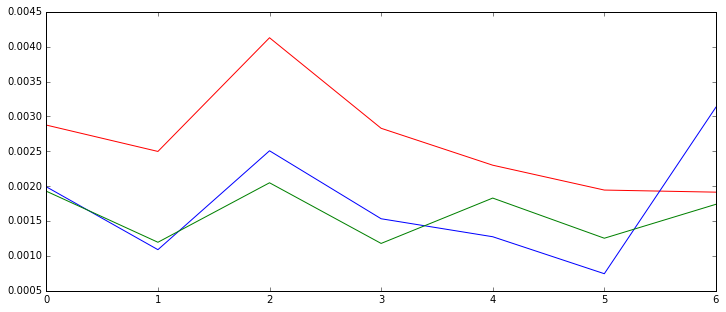

In [35]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gun)),gun,color='r')
plt.plot(range(len(girl)),girl,color='b')
plt.plot(range(len(cig)),cig,color='g')

In [102]:
normlengths = [(i-np.mean(lengths))/(max(lengths)-min(lengths)) for i in lengths]
normsent = [(i-np.mean(sentscore))/(max(sentscore)-min(sentscore)) for i in sentscore]

In [103]:
normlengths

[-0.12767814306275851,
 0.059176166868474496,
 -0.095981357519819122,
 -0.057855657855657924,
 0.010367594982979532,
 0.60598569829339055,
 -0.39401430170660945]

In [104]:
normsent

[-0.45369639568534592,
 -0.108392528282031,
 0.16877137595369643,
 -0.18850302551960005,
 -0.029202841357537444,
 0.54630360431465408,
 0.064719810576164216]

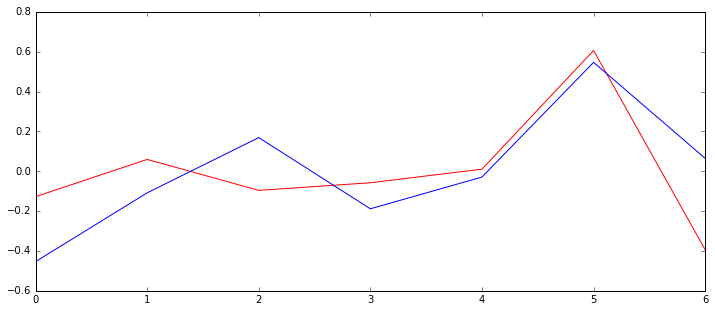

In [105]:
plt.figure(figsize=(12,5))
plt.plot(range(len(normlengths)),normlengths,color='r')
plt.plot(range(len(normsent)),normsent,color='b')

In [37]:
gunabs = [i[0] for i in wordcounts]
girlabs = [i[1] for i in wordcounts]
cigabs = [i[2] for i in wordcounts]

In [38]:
wordcounts

[[91, 63, 61],
 [94, 41, 45],
 [135, 82, 67],
 [96, 52, 40],
 [83, 46, 66],
 [107, 41, 69],
 [44, 72, 40]]

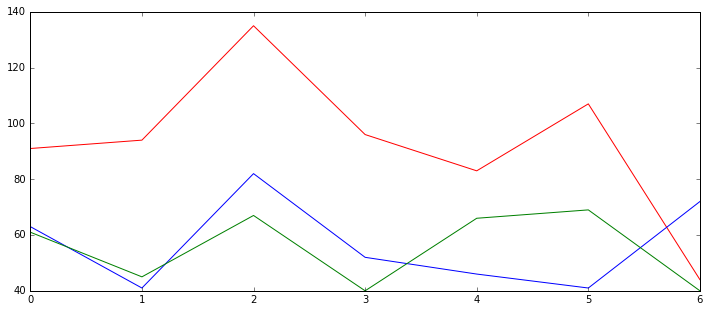

In [39]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gunabs)),gunabs,color='r')
plt.plot(range(len(girlabs)),girlabs,color='b')
plt.plot(range(len(cigabs)),cigabs,color='g')

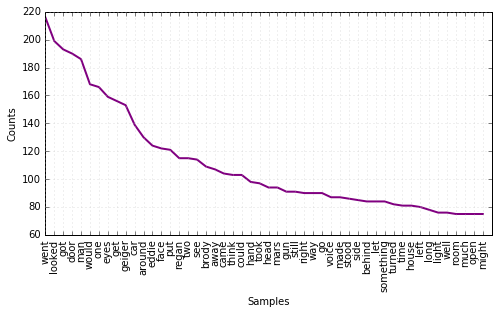

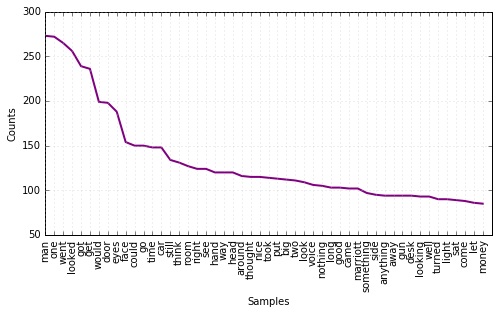

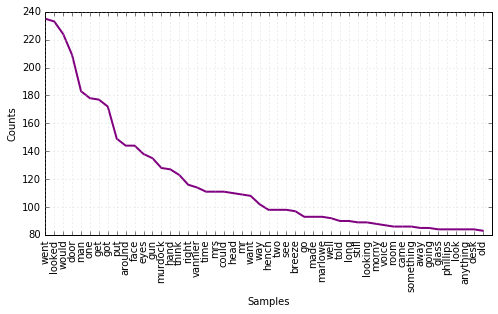

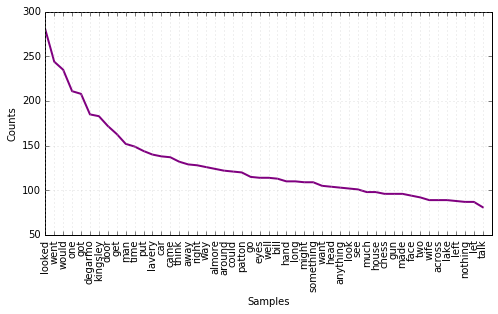

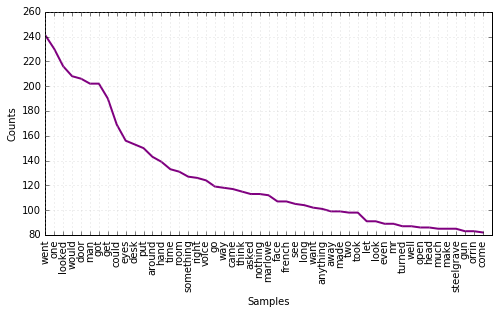

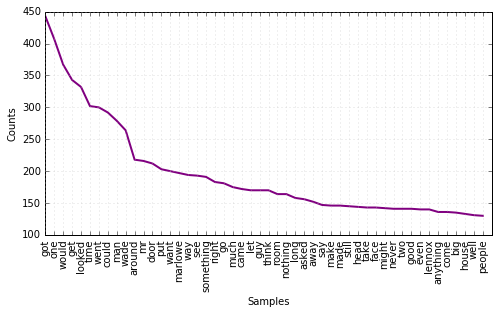

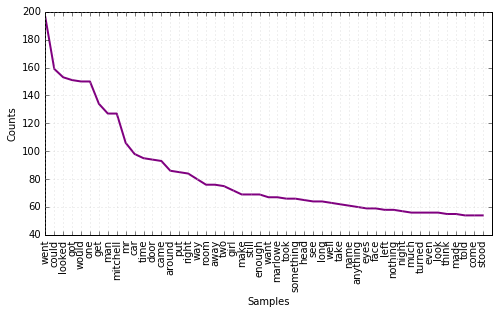

In [106]:
for i in fds:
    plt.figure(figsize=(8,4))
    i.plot(50,cumulative=False,color='purple')

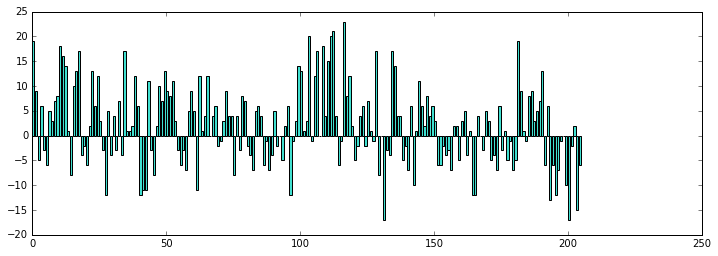

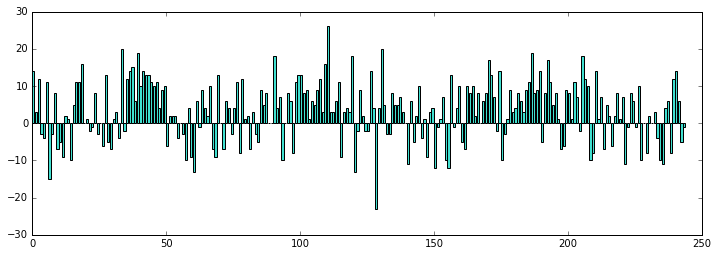

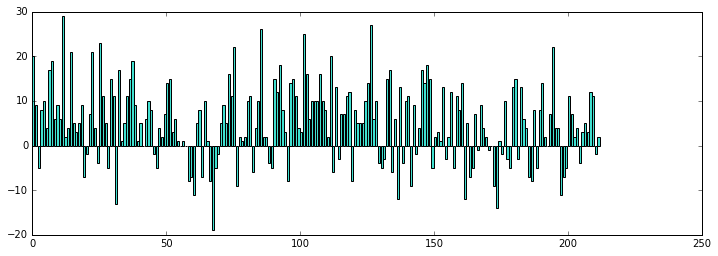

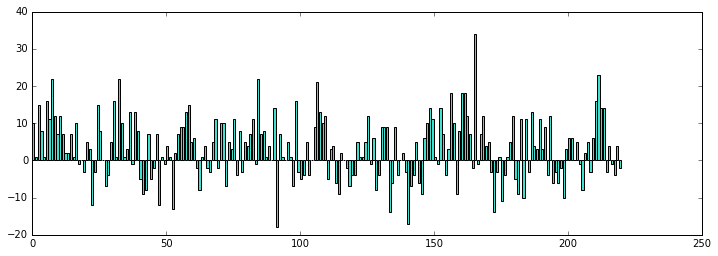

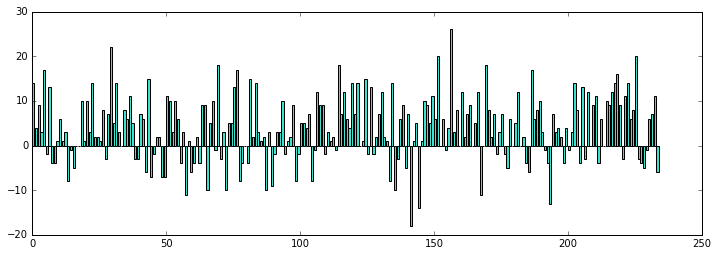

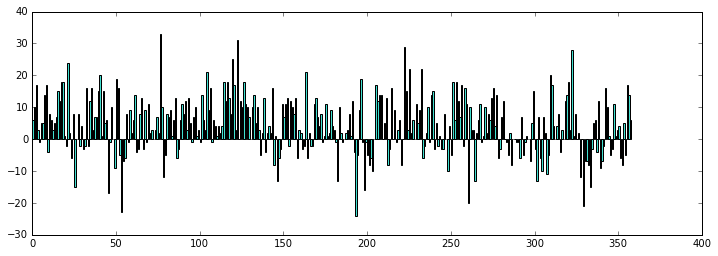

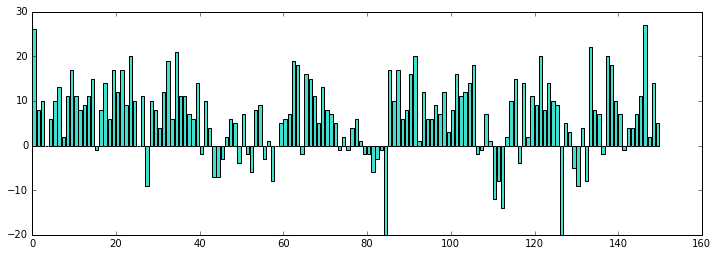

In [108]:
for i in sentpages:
    plt.figure(figsize=(12,4))
    plt.bar(range(len(i)),i,color='turquoise')

#### sentiment transforms

In [57]:
import scipy

In [58]:
from scipy import fftpack

#### sp0

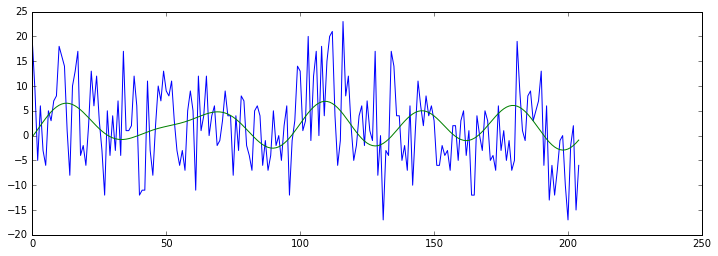

In [104]:
x = range(len(sentpages[0]))
cN = len(sentpages[0])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[0])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/5)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp1

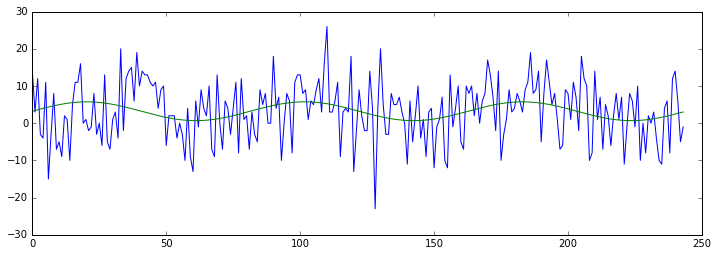

In [105]:
x = range(len(sentpages[1]))
cN = len(sentpages[1])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[1])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/10)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp2

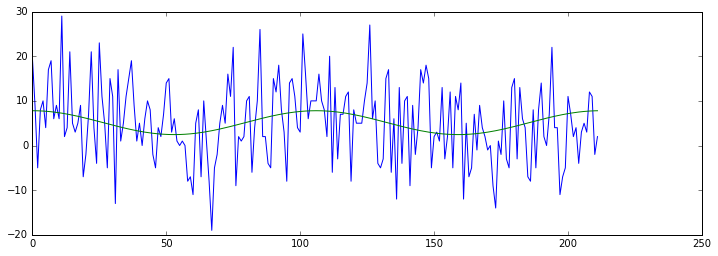

In [106]:
x = range(len(sentpages[2]))
cN = len(sentpages[2])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[2])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/16)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp3

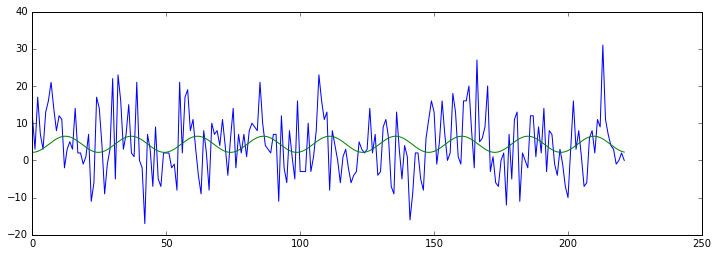

In [79]:
x = range(len(sentpages[3]))
cN = len(sentpages[3])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[3])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/16)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp4

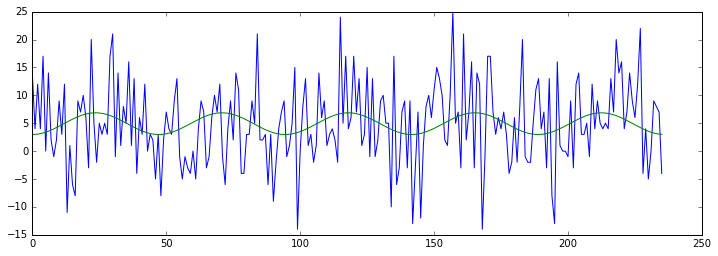

In [73]:
x = range(len(sentpages[4]))
cN = len(sentpages[4])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[4])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/26)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp5

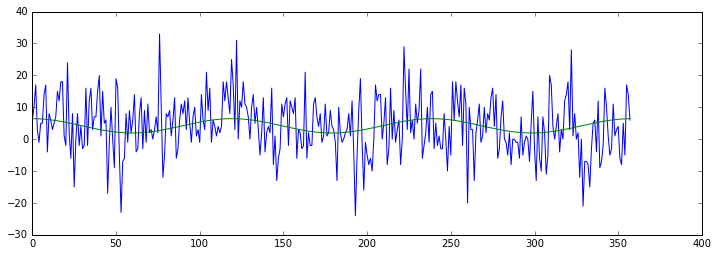

In [109]:
x = range(len(sentpages[5]))
cN = len(sentpages[5])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[5])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/15)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp6

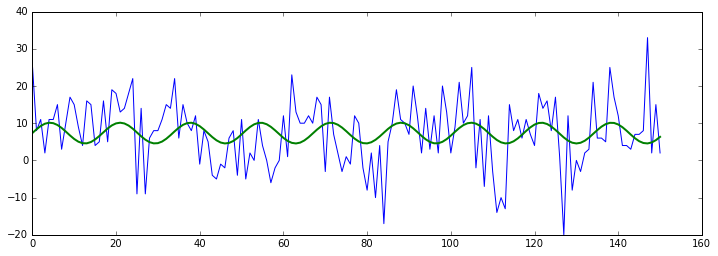

In [88]:
x = range(len(sentpages[6]))
cN = len(sentpages[6])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[6])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/33)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2, linewidth=2)

In [172]:
len(completeposwords), len(completenegwords)

(34651, 28332)